In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [38]:
#assumptions: 
#clockwise is actually clockwise about the origin
#coordinates are all in reference to our center point

In [117]:
#try out the functions
H = 160 #angle of hard limit relative to x-axis (pos or neg)
R_theta = 3 #arm lengths 
R_phi = 3
x0 = 1 #starting point of positioner (take an initial pic)
y0 = 1

In [118]:
def transform(H,R_theta,R_phi,x,y): #function to output theta and phi angles based on coordinates relative to center 
    
    if x==0 and y==0:
        theta = 0
        phi = 0

    else:
        H = H*np.pi/180
        d = np.sqrt(x**2 + y**2)
        a = d*np.cos(H)
        b = d*np.sin(H)
        r = np.sqrt((x-a)**2 + (y-b)**2)
        alpha = 2*np.arcsin(r/(2*d))
        #print(alpha*180/np.pi)
        phi = np.arccos((R_phi**2 + R_theta**2 - d**2)/(2*R_theta*R_phi))
        d_theta = np.arcsin(R_theta*np.sin(phi)/d)
    
        if abs(H) > np.pi/2:
            if y>(b/a)*x:
                theta = alpha + d_theta
            if y<=(b/a)*x:
                theta = ((2*np.pi)-alpha) + d_theta
        else:
            if y>(b/a)*x:
                theta = ((2*np.pi)-alpha) + d_theta
            if y<=(b/a)*x:
                theta = alpha + d_theta 
    
    theta = theta*180/np.pi
    phi = phi*180/np.pi
    
    if theta>360:
        theta = theta - 360
    
    return theta,phi

In [119]:
def calc_moves(H,R_theta,R_phi,x0,y0,x,y): #function to output moves in theta and phi (pos being cw)

    #where you are
    theta0,phi0 = transform(H,R_theta,R_phi,x0,y0)
    #where you want to be 
    theta,phi = transform(H,R_theta,R_phi,x,y)
    #difference
    delta_theta = theta-theta0
    delta_phi = phi-phi0
    
    #optional logic
    if delta_theta >= 0:
        theta_cw = abs(delta_theta)
        theta_ccw = 0
    elif delta_theta < 0:
        theta_cw = 0
        theta_ccw = abs(delta_theta)
    if delta_phi >= 0:
        phi_cw = abs(delta_phi)
        phi_ccw = 0
    elif delta_phi < 0:
        phi_cw = abs(delta_phi)
        phi_ccw = 0
    
    return delta_theta,delta_phi

In [120]:
#version that does move tables
def calc_movetables(H,R_theta,R_phi,x0,y0,x,y): #function to output moves in theta and phi (pos being cw)

    #where you are
    theta0,phi0 = transform(H,R_theta,R_phi,x0,y0)
    #where you want to be 
    theta,phi = transform(H,R_theta,R_phi,x,y)
    #difference
    delta_theta = theta-theta0
    delta_phi = phi-phi0
    

    #optional logic
    if delta_theta >= 0:
        direc1 = "cw"
        motor1 = "theta"
        angle1 = abs(delta_theta)
    elif delta_theta < 0:
        direc1 = "ccw"
        motor1 = "theta"
        angle1 = abs(delta_theta)
    if delta_phi >= 0:
        direc2 = "cw"
        motor2 = "phi"
        angle2 = abs(delta_phi)
    elif delta_phi < 0:
        direc2 = "ccw"
        motor2 = "phi"
        angle2 = abs(delta_phi)
    
    return direc1,motor1,angle1,direc2,motor2,angle2

In [121]:
#translate starting point into theta,phi positions 
theta0,phi0 = transform(H,R_theta,R_phi,x0,y0)
print(theta0,phi0)

191.36697777463365 27.266044450732828


In [122]:
#Generate the points we will attempt
xpoints = [x0]
ypoints = [y0]

X = int(R_theta+R_phi-0.5) # R is the radius
for x in range(-X,X+1):
    Y = int(((R_theta+R_phi-0.5)**2-x**2)**0.5) # bound for y given x
    for y in range(-Y,Y+1):
        xpoints.append(x)
        ypoints.append(y)

print(xpoints,ypoints)
print(len(xpoints))

[1, -5, -5, -5, -5, -5, -4, -4, -4, -4, -4, -4, -4, -3, -3, -3, -3, -3, -3, -3, -3, -3, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5] [1, -2, -1, 0, 1, 2, -3, -2, -1, 0, 1, 2, 3, -4, -3, -2, -1, 0, 1, 2, 3, 4, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -4, -3, -2, -1, 0, 1, 2, 3, 4, -3, -2, -1, 0, 1, 2, 3, -2, -1, 0, 1, 2]
98


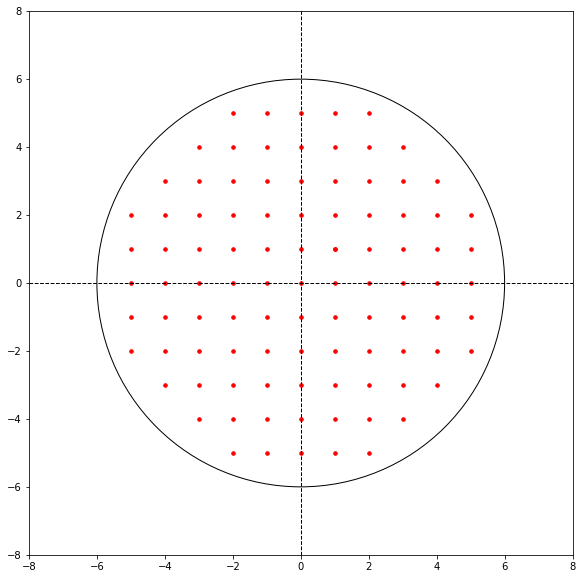

In [123]:
#plot the points we will attempt
figure, axes = plt.subplots(figsize=(10,10))
circle = plt.Circle( (0, 0 ),R_theta+R_phi ,fill = False )
axes.add_artist(circle)
axes.set_aspect( 1 )
plt.scatter(xpoints,ypoints, s = 50, marker = '.', color = 'red')
plt.axvline(0, linestyle = '--', linewidth = 1, color = 'k')
plt.axhline(0, linestyle = '--', linewidth = 1, color = 'k')

plt.xlim((-8,8))
plt.ylim((-8,8))
plt.show()

In [124]:
#create the move table (pos angles are clockwise and neg angles are counterclockwise)
theta_moves = []
phi_moves = []

for i in range(0,len(xpoints)-1):
    delta_theta,delta_phi = calc_moves(H,R_theta,R_phi,xpoints[i],ypoints[i],xpoints[i+1],ypoints[i+1])
    theta_moves.append(delta_theta)
    phi_moves.append(delta_phi)


[152.9966692568497, -343.8674794861251, 13.061142216562416, 9.558722731478099, 4.8504335107882035, 308.7209461118897, 18.557851602623884, -342.68913791826685, 15.63355930378765, 12.438927632065315, 7.746753336569888, 2.05184133490814, 270.0, 19.57279259223526, 19.373742580600663, -339.6147914229012, 20.241048842300472, 16.62884880354352, 10.125028829016685, 3.2461223674398525, -3.312587883923328, 231.27905388811038, 20.40890006866954, 18.378511559703554, 20.12061666538409, -335.32041682136213, 28.9747018889272, 24.155400465228766, 12.190314467206207, 2.4992482826562963, -4.128478861899978, -10.881616687217232, 218.75238546191537, 17.512580242887907, 16.00023606725688, 18.05533102719454, -333.3172020561044, 49.03895399850592, 40.96104600149411, 10.187099701948426, -1.7951263188826374, -7.202825357265752, -12.05995825507543, 193.06114221656242, 14.63237534230069, 11.810314895778674, 10.528779365509308, 9.87715240763032, -330.4059317731397, 150.4059317731396, -9.877152407630291, -10.52877

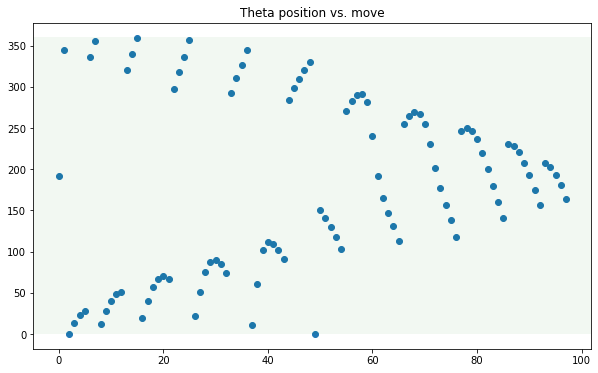

In [125]:
#check that the theta positions are all safe (between zero and 360)
print(theta_moves)

theta_pos = [theta0]
for i in range(1,len(xpoints)):
    theta_pos.append(sum(theta_moves[0:i])+theta0)
    
print(theta_pos)

time = np.arange(0,len(theta_pos))
plt.figure(figsize=(10,6))
plt.title("Theta position vs. move")
plt.scatter(time,theta_pos)
plt.axhspan(0, 360, facecolor ='g', alpha = 0.05)
plt.show()

[100.4038425135968, -11.282087003086644, -3.502419485084417, 3.502419485084417, 11.282087003086644, -14.784506488171061, -16.506010267715766, -9.56410874516321, -3.194631671722405, 3.194631671722405, 9.56410874516321, 16.506010267715766, 0.0, -22.885380476158588, -16.127620213160753, -10.260179748082223, -3.6122000387570026, 3.6122000387570026, 10.260179748082223, 16.127620213160753, 22.885380476158588, 14.784506488171061, -31.290516755886827, -22.506990421603575, -17.62136838272781, -12.489268711431613, -4.819301423698427, 4.819301423698427, 12.489268711431613, 17.62136838272781, 22.506990421603575, 31.290516755886827, -11.282087003086644, -29.572538497963393, -23.203061424522588, -19.8504573460772, -16.495698241946982, -8.077907997011899, 8.077907997011899, 16.495698241946982, 19.8504573460772, 23.203061424522588, 29.572538497963393, -3.502419485084417, -29.26475068460138, -23.620629791557185, -21.057558731018624, -19.754304815260454, -19.18813645372093, 19.18813645372093, 19.7543048

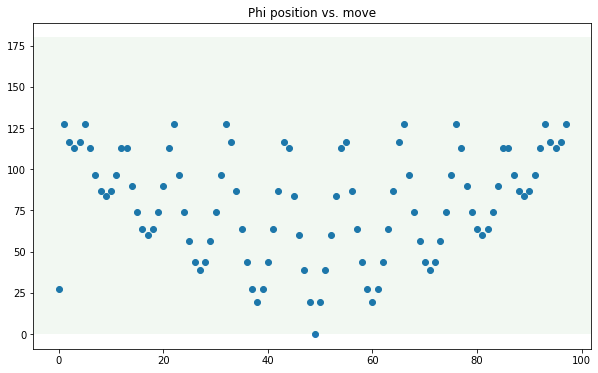

In [126]:
#check that the phi positions are all safe (between 0 and 180)
print(phi_moves)

phi_pos = [phi0]
for i in range(1,len(xpoints)):
    phi_pos.append(sum(phi_moves[0:i])+phi0)
    
print(phi_pos)

time = np.arange(0,len(phi_pos))
plt.figure(figsize=(10,6))
plt.title("Phi position vs. move")
plt.scatter(time,phi_pos)
plt.axhspan(0, 180, facecolor ='g', alpha = 0.05)
plt.show()

In [127]:
###############################################################################################################################

In [128]:
#beyond this is for testing only 
#code from Thomas to check that my angles make sense, they won't match unless you do the math,
#but it should look like the angles of the arms match up

def get_angles(target, len1=3.0, len2=3.0):
    """
    NOTE: This code was adapted from "https://courses.ideate.cmu.edu/16-375/f2020/text/code/lecture-samples/two-link-ik.html"
    The angles "alpha" wrt the arm attached to the origin was given wrt the -Y axis, and the angle "beta" wrt the second arm was given wrt
    the first arm, so the elbow angle was being calculated. The angles returned now are both wrt the positive X axis.
    I also have plotted the results as a visual confirmation that the task was successful.
    
    Compute two inverse kinematics solutions for a target end position.  The
    target is a Cartesian position vector (two-element ndarray) in world
    coordinates, and the result vectors are joint angles as ndarrays [q0, q1].
    If the target is out of reach, returns the closest pose.

    :param target: two-element list or ndarray with [x1, y] target position
    :param len1: optional proximal link length
    :param len2: optional distal link length
    :return: tuple (solution1, solution2) of two-element ndarrays with q1, q2 angles
    """

    # find the position of the point in polar coordinates
    radiussq = np.dot(target, target)
    radius   = math.sqrt(radiussq)

    # theta is the angle of target point w.r.t. -Y axis, same origin as arm
    theta    = math.atan2(target[0], -target[1]) 
    

    # use the law of cosines to compute the elbow angle
    #   R**2 = l1**2 + l2**2 - 2*l1*l2*cos(pi - elbow)
    #   both elbow and -elbow are valid solutions
    acosarg = (radiussq - len1**2 - len2**2) / (-2 * len1 * len2)
    if acosarg < -1.0:  elbow_supplement = math.pi
    elif acosarg > 1.0: elbow_supplement = 0.0
    else:               elbow_supplement = math.acos(acosarg)

    # use the law of sines to find the angle at the bottom vertex of the triangle defined by the links
    #  radius / sin(elbow_supplement)  = l2 / sin(alpha)
    if radius > 0.0:
        alpha = math.asin(len2 * math.sin(elbow_supplement) / radius)
    else:
        alpha = 0.0

    #  compute the two solutions with opposite elbow sign
    soln1 = np.array((theta - alpha, math.pi - elbow_supplement))
    soln2 = np.array((theta + alpha, elbow_supplement - math.pi))
    
    # I think here I'm trying to ensure the angle is positive/negative when it should be, although it doesn't matter
    if (-np.pi < theta - alpha) & (theta - alpha < -np.pi/2):
        sol = np.array((theta - alpha + 3*np.pi/2, math.pi - elbow_supplement))
        sol2 = np.array((theta + alpha + 3*np.pi/2, elbow_supplement - math.pi))
    else:
        sol = np.array((theta - alpha - np.pi/2, math.pi - elbow_supplement))
        sol2 = np.array((theta + alpha - np.pi/2, elbow_supplement - math.pi))
    
    # See if we can plot our results, first plot the target
    plt.figure(figsize = (8,8))
    plt.scatter(target[0],target[1], s = 500, marker = '*', color = 'red')
    plt.axvline(0, linestyle = '--', linewidth = 1, color = 'k')
    plt.axhline(0, linestyle = '--', linewidth = 1, color = 'k')
    plt.xlim((-6,6))
    plt.ylim((-6,6))
    
    origin = [0,0]

    # Find the location of the first solution joint geometrically 
    joint1 = [len1 * np.cos(sol[0]), len1 * np.sin(sol[0])]

    x_values1_0 = [origin[0], joint1[0]]
    y_values1_0 = [origin[1], joint1[1]]

    
    # End point of the second arm geometrically using the calculated angles 
    end1 = [x_values1_0[1] + len2 * np.cos(soln1[1] + sol[0]), y_values1_0[1] + len2 * np.sin(soln1[1] + sol[0])]
   
    x_values2 = [joint1[0], end1[0]]
    y_values2 = [joint1[1], end1[1]]
    
    plt.plot(x_values1_0, y_values1_0, 'bo', linestyle="--", markersize = 5)
    plt.plot(x_values2, y_values2, 'bo', linestyle="--", markersize = 5)
    
    # Now, see if we can do the same thing for the second solution
    
    joint2 = [len1 * np.cos(sol2[0]), len1 * np.sin(sol2[0])]
    
    x_values1_1 = [origin[0], joint2[0]]
    y_values1_1 = [origin[1], joint2[1]]
    
    end2 = [x_values1_1[1] + len2 * np.cos(soln2[1] + sol2[0]), y_values1_1[1] + len2 * np.sin(soln2[1] + sol2[0])]
    
    x_values2_1 = [joint2[0], end2[0]]
    y_values2_1 = [joint2[1], end2[1]]
    
    
    plt.plot(x_values1_1, y_values1_1, 'yo', linestyle="--", markersize = 5)
    plt.plot(x_values2_1, y_values2_1, 'yo', linestyle="--", markersize = 5)
    
    
    # If the figure looks like the arms are in the correct location, then the angles are correct...
    
    #OK, so what are my actual angles???
    angles1 = [sol[0], soln1[1] + sol[0]]
    angles2 = [sol2[0], soln2[1] + sol2[0]]
    
    angles1 = [i - 2*np.pi if i > np.pi else i for i in angles1]
    angles2 = [i - 2*np.pi if i > np.pi else i for i in angles2]
    
    print ('Angles for solution 1: {}, {}'.format(math.degrees(angles1[0]), math.degrees(angles1[1])))
    print ('Angles for solution 2: {}, {}'.format(math.degrees(angles2[0]), math.degrees(angles2[1])))
    return angles1, angles2

Angles for solution 1: -89.90450710254372, 89.90450687732587
Angles for solution 2: 89.90450710254372, -89.90450687732587


([-1.5691296613220151, 1.5691296573912221],
 [1.5691296613220151, -1.5691296573912221])

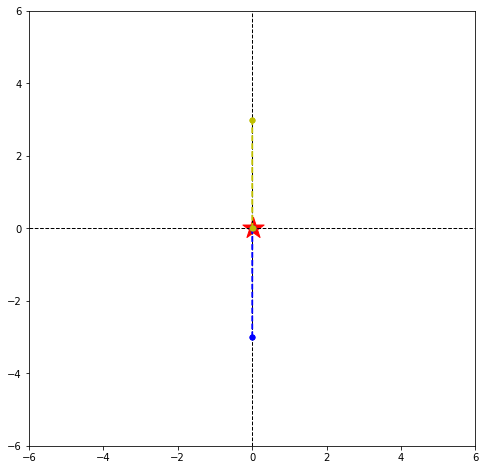

In [135]:
get_angles((0.01,0))

Angles for solution 1: 90.0, 90.0
Angles for solution 2: 90.0, 90.0


([1.5707963267948966, 1.5707963267948966],
 [1.5707963267948966, 1.5707963267948966])

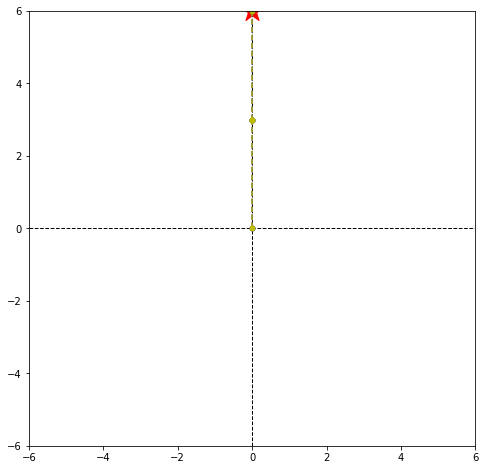

In [136]:
get_angles((0,6))

In [141]:
x = -5 #destination point
y = -1
delta_theta, delta_phi = calc_moves(H,R_theta,R_phi,0.00,0.00,0,1)
direc1,motor1,angle1,direc2,motor2,angle2 = calc_movetables(H,R_theta,R_phi,0.01,0.01,0,6)

In [149]:
direc1,motor1,angle1,direc2,motor2,angle2 = calc_movetables(H,R_theta,R_phi,0.01,0.01,0.00,0.00)

In [150]:
#Does the solution look right?
print(delta_theta, delta_phi)
print(direc1,motor1,angle1,direc2,motor2,angle2)


150.4059317731396 19.18813645372093
ccw theta 204.86495238571428 ccw phi 0.270095144935158
